# HW 1 - Introduction

All task will use the same sample code listed below. Just copy and then modify it when required.

In [1]:
#Sample code written by an imaginary unexperienced user of Python
#Function calculates the average number of occurances for each element
#in a given sequence
def AverageCounter(sequence):
    length = len(sequence)
    elements = {}
    for i in range(1, length):
        elements[sequence[i]] = 0.0
    for element in elements.keys():
        for i in range(1,length):
            elements[element] += sequence[i]
        elements[element] /= length
    print(elements)    
    return elements

## Task 1. Debugging (5 points)
Use iPython magic commands to debug a sample Python's script. If necessary use introspection to checkout debug magic commands usage.

python magic:
http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [3]:
%%debug
AverageCounter([2, 4, 5, 6, 7, 2 ,3 ,4])

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(2)<module>()

ipdb> help

Documented commands (type help <topic>):
EOF    cl         disable  interact  next    psource  rv         unt   
a      clear      display  j         p       q        s          until 
alias  commands   down     jump      pdef    quit     source     up    
args   condition  enable   l         pdoc    r        step       w     
b      cont       exit     list      pfile   restart  tbreak     whatis
break  continue   h        ll        pinfo   return   u          where 
bt     d          help     longlist  pinfo2  retval   unalias  
c      debug      ignore   n         pp      run      undisplay

Miscellaneous help topics:
exec  pdb

ipdb> step
--Call--
> <ipython-input-1-39f32459868b>(4)AverageCounter()
      2 #Function calculates the average number of occurances for each element
      3 #in a given sequence
----> 4 def AverageCounter(sequence):
      5     length = len(sequence)
      6   

In [2]:
# Видно, что на каждом шаге вычисления среднего для числа
# выходит одно и то же число, ещё и больше 1
# В результате ошибка заключается в работе цикла в строках 9-13
# В инициализации ошибки не обнаружено

## Task 2. Profiling (5 points)
Profile debugged version of the sample Python's function. Your goal is to accomplish the following:

1. Profile function's execution time and detect most computationally intensive parts of the function.
2. Suggest improvements of the function's code. Try to make function's execution as fast as possible. Your Python's code should be idiomatic.
3. Use profiler to explore how your modifications affect execution time.
4. Approximate performance function (sequence length to execution time function) of the initial and optimized functions. Compare the results.

In [2]:
import numpy as np
import random

In [3]:
# for Profiling
%load_ext line_profiler

In [4]:
# Another way for Profiling
from line_profiler import LineProfiler
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

In [5]:
# Debug version 
def AverageCounter(sequence):
    length = len(sequence)
    elements = {}
    for i in range(length):
        elements[sequence[i]] = 0.0
    for element in elements.keys():
        for i in range(length):
            elements[element] += element == sequence[i]
        elements[element] /= length   
    return elements

In [6]:
# from a to b with n elements
a = 1
b = 100
n = 10000
test_sequence = [random.randint(a,b) for i in range(n)]

In [7]:
#Profile function's execution time and detect most computationally intensive parts of the function.

In [8]:
%lprun -f AverageCounter  AverageCounter(test_sequence)

In [9]:
profile_print(AverageCounter, test_sequence)

Timer unit: 1e-06 s

Total time: 1.70154 s
File: <ipython-input-5-c28e73f07dd4>
Function: AverageCounter at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def AverageCounter(sequence):
     3         1          2.0      2.0      0.0      length = len(sequence)
     4         1          1.0      1.0      0.0      elements = {}
     5     10001       6945.0      0.7      0.4      for i in range(length):
     6     10000       7540.0      0.8      0.4          elements[sequence[i]] = 0.0
     7       101        117.0      1.2      0.0      for element in elements.keys():
     8   1000100     703547.0      0.7     41.3          for i in range(length):
     9   1000000     983219.0      1.0     57.8              elements[element] += element == sequence[i]
    10       100        170.0      1.7      0.0          elements[element] /= length   
    11         1          0.0      0.0      0.0      return elements



In [10]:
# Suggest improvements of the function's code.
# Try to make function's execution as fast as possible.
# Your Python's code should be idiomatic.

In [11]:
# Numpy version
def numpy_AverageCounter(sequence):
    unique, counts = np.unique(sequence, return_counts=True)
    counts = counts / np.size(sequence)
    elements = dict(zip(unique, counts))
    return elements

In [12]:
# Все работает
res_1 = AverageCounter(test_sequence)
res_2 = numpy_AverageCounter(test_sequence)
print(res_1[1])
print(res_2[1])

0.0104
0.0104


In [13]:

# Use profiler to explore how your modifications affect execution time.

In [14]:
%%timeit -r 20
res_1 = AverageCounter(test_sequence)

224 ms ± 7.84 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [15]:
%%timeit -r 20
res_2 = numpy_AverageCounter(test_sequence)

2.76 ms ± 250 µs per loop (mean ± std. dev. of 20 runs, 100 loops each)


In [16]:
profile_print(numpy_AverageCounter, test_sequence)

Timer unit: 1e-06 s

Total time: 0.004264 s
File: <ipython-input-11-95e04785be57>
Function: numpy_AverageCounter at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
     2                                           def numpy_AverageCounter(sequence):
     3         1       2579.0   2579.0     60.5      unique, counts = np.unique(sequence, return_counts=True)
     4         1       1619.0   1619.0     38.0      counts = counts / np.size(sequence)
     5         1         64.0     64.0      1.5      elements = dict(zip(unique, counts))
     6         1          2.0      2.0      0.0      return elements



In [20]:
# Approximate performance function (sequence length to execution time function)
# of the initial and optimized functions. Compare the results.

In [17]:
import matplotlib.pyplot as plt

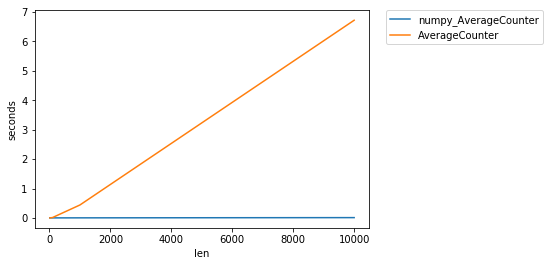

In [19]:
from timeit import timeit
n = [10 ** i for i in range(1, 5)]
algorithms_labels = ['numpy_AverageCounter',
                     'AverageCounter']
algorithm_time = [[0] * len(n) for i in range(len(algorithms_labels))]
algorithms = [numpy_AverageCounter,
              AverageCounter]
for i, n_samples in enumerate(n):
    test_sequence = [random.randint(1,1000) for i in range(n_samples)]
    for j, algorithm in enumerate(algorithms):
        algorithm_time[j][i] = timeit(lambda: algorithm(test_sequence), number=3)
        
for i, label in enumerate(algorithms_labels):
    plt.plot(n, algorithm_time[i], label=label)

plt.xlabel('len')
plt.ylabel('seconds')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [29]:
# Заметна чисто линейная зависимость o(N) у AverageCounter

## Task 3. Running scripts (5 points)
Use iPython features for interaction with operating system to accomplish the following tasks:
1. Wrap debugged and improved version of the ```AverageCounter( sequence )``` function, so that it can be run as a Python script (use command line arguments to pass the ```filename``` parameter, which contains the sequence).
2. Create a script, which generate a set of testcases (files, which contains randomly generated sequences)
3. Create a script, which runs the testcases and measures performance of the supplied function on the provided testcase. Th scipt must be as generic as possible.

In [21]:
# Wrap debugged and improved version of the AverageCounter( sequence ) function,
# so that it can be run as a Python script (use command line arguments to pass 
# the filename parameter, which contains the sequence).

In [22]:
%%file Average_Counter.py
import numpy as np
def read_sequence(filename):
    with open(filename, 'r') as f:
        sequence = f.read().splitlines()
    sequence = list(map(int, sequence))
    return sequence
def AverageCounter(filename):
    sequence = read_sequence(filename)
    unique, counts = np.unique(sequence, return_counts=True)
    counts = counts / np.size(sequence)
    elements = dict(zip(unique, counts))
    return elements

Writing Average_Counter.py


In [23]:
# Create a script, which generate a set of testcases 
# (files, which contains randomly generated sequences)

In [24]:
%%file Test_Generator.py
import numpy as np
def write_sequence(filename, sequence):
    with open(filename, 'w') as f:
        for item in sequence:
            f.write("{}\n".format(item))
def TestGenerator(filename):
    n = np.random.randint(10, 1000)
    left = np.random.randint(-n, n)
    right = np.random.randint(left + 1, left + n)
    size = np.random.randint(abs(right - left) , (abs(right - left)) * n)
    sequence = np.random.randint(left, right, size)
    write_sequence(filename, sequence)
    return size

Writing Test_Generator.py


In [25]:
# Create a script, which runs the testcases and measures 
# performance of the supplied function on the provided testcase. 
# Th scipt must be as generic as possible.

In [26]:
%%file Test_Script.py 
from timeit import timeit
from Test_Generator import TestGenerator
from Average_Counter import AverageCounter
def TestScript(filename, n):
    t = [0] * n
    s = [0] * n
    for i in range(n):
        size = TestGenerator(filename)
        s[i] = size
        t[i] = timeit(lambda: AverageCounter(filename), number=3)
    return t, s

Writing Test_Script.py


In [27]:
import Test_Script

Text(0,0.5,'size')

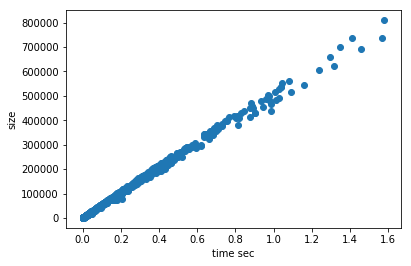

In [28]:
# Визуализация производительности при n запусков
n = 1000
t, s = Test_Script.TestScript('test.txt', n)
plt.scatter(t, s)
plt.xlabel('time sec')
plt.ylabel('size')